# Kingman's Coalescent Times

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import torch
import pyro
import pyro.distributions as dist
import matplotlib.pyplot as plt
from pyro.distributions.coalescent import CoalescentTimesConstraint

pyro.enable_validation(True)

In [2]:
leaf_times = torch.tensor([0.0, 0.5, 1.0])
d = dist.CoalescentTimes(leaf_times)

In [3]:
t = torch.linspace(-2, 0.499, 100)
x, y = torch.meshgrid(t, t)
coal_times = torch.stack([x, y], dim=-1)
ok = CoalescentTimesConstraint(leaf_times).check(coal_times)
print(ok)

tensor([[ True,  True,  True,  ...,  True,  True,  True],
        [ True,  True,  True,  ...,  True,  True,  True],
        [ True,  True,  True,  ...,  True,  True,  True],
        ...,
        [ True,  True,  True,  ..., False, False, False],
        [ True,  True,  True,  ..., False, False, False],
        [ True,  True,  True,  ..., False, False, False]])


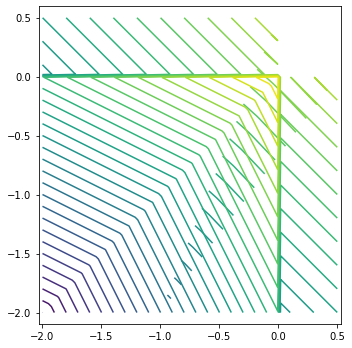

In [4]:
x = x.masked_fill(~ok, -1)
y = y.masked_fill(~ok, -2)
coal_times = torch.stack([x, y], dim=-1)
ok = CoalescentTimesConstraint(leaf_times).check(coal_times)
log_prob = d.log_prob(coal_times)

plt.figure(figsize=(5,5)).patch.set_color("white")
plt.axis("equal")
plt.contour(x, y, log_prob, levels=30)
plt.xlim(-2, 0.5)
plt.ylim(-2, 0.5)
plt.tight_layout()

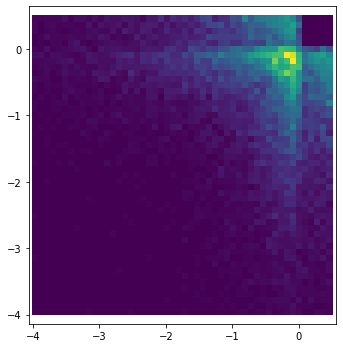

In [5]:
coal_times = d.sample((10000,))
x, y = coal_times.unbind(-1)
x, y = torch.cat([x, y]), torch.cat([y, x])

plt.figure(figsize=(5,5)).patch.set_color("white")
plt.axis("equal")
plt.hist2d(x.numpy(), y.numpy(), bins=50, range=((-4,0.5), (-4, 0.5)))
plt.xlim(-4, 0.5)
plt.ylim(-4, 0.5)
plt.tight_layout()

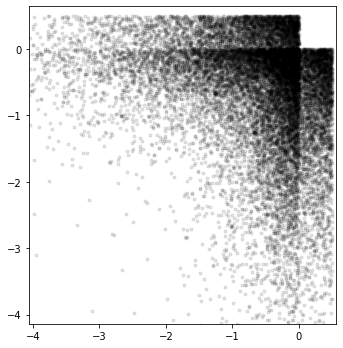

In [6]:
plt.figure(figsize=(5,5)).patch.set_color("white")
plt.axis("equal")
plt.plot(x, y, "k.", lw=0, alpha=0.1)
plt.xlim(-4, 0.5)
plt.ylim(-4, 0.5)
plt.tight_layout()